In [1]:
%matplotlib inline
import pfunk
import matplotlib.pyplot as plt
import numpy as np
import corner

In [2]:
fresco_path = '48Ca_elastic_new.in'
fresco_names = ['p1', 'p2', 'p3', 'p4', ('p5', 'p5'), ('p6', 'p6'), 'p4']
fresco_positions = [54, 55, 56, 57, (58, 66), (59, 67), 65]
elastic_data_path = '48Ca_p_p.dat'


In [20]:
model = pfunk.model.Model(fresco_path, fresco_names, fresco_positions) # create model
model.create_pot_prior(model.fresco.x0, model.fresco.x0) # 100% priors from global values
model.create_norm_prior([-10.0], [10.0])
model.create_scatter_prior([1.0])
model.create_prior() # Finish setting up the prior functions

model.create_elastic_likelihood('fort.201', elastic_data_path, norm_index=0, scatter_index=1)
model.create_likelihood()
print(model.x0)

[-10.     0.    52.52   1.17   0.75   2.58   1.32   0.63   7.8 ]


In [21]:
sampler = pfunk.sampler.Sampler(model)

In [22]:
sampler.run_nested()

10959it [15:58:45,  5.25s/it, +250 | bound: 280 | nc: 1 | ncall: 2462899 | eff(%):  0.455 | loglstar:   -inf < 32.316 <    inf | logz: -6.826 +/-  0.529 | dlogz:  0.000 >  0.010]


In [23]:
s = pfunk.utilities.make_samples_dynesty(sampler.sampler.results)

(9,)


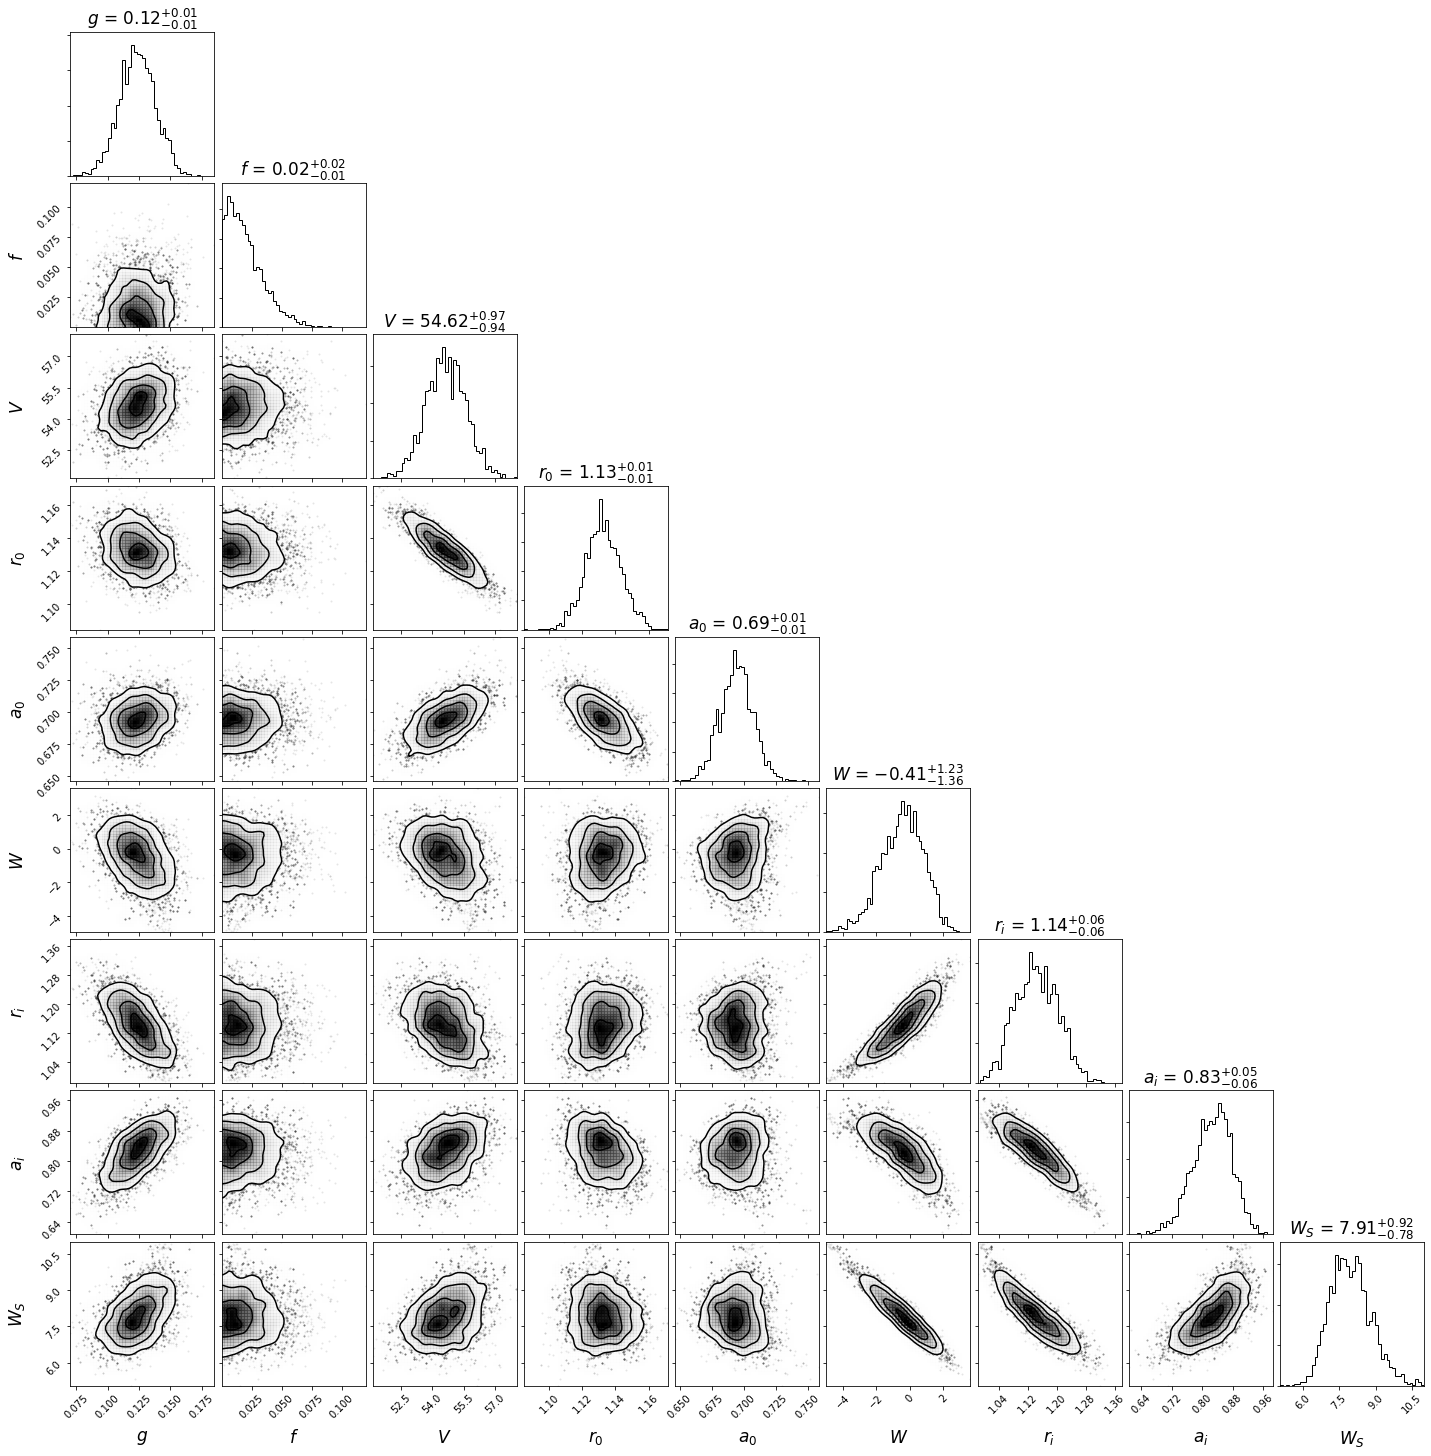

In [24]:
print(model.x0.shape)
labels = ['$g$', '$f$', '$V$', '$r_0$', '$a_0$', '$W$', '$r_i$', '$a_i$', '$W_S$']
p = corner.corner(s, bins=50, smooth=1.5, labels=labels,
                  show_titles=True, title_kwargs={'fontsize':17.0},
                  label_kwargs={'fontsize':17.0})


In [25]:
all_cs = []
for ele in s:
    model.run_fresco(ele)
    cs_temp = pfunk.fresco_classes.read_cross('fort.201')
    cs_temp.sigma = cs_temp.sigma*10**(ele[0])
    all_cs.append(cs_temp)


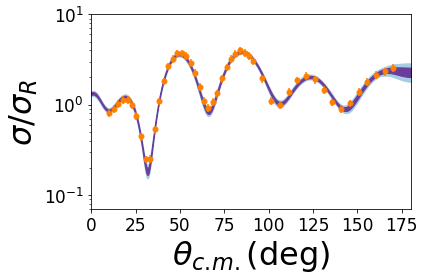

In [26]:
d = model.likelihood[0].data
pfunk.utilities.plot_ci(all_cs, data=d)
plt.ylim(0.07, 10.0)
plt.ylabel('$\sigma / \sigma_R$')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.tight_layout()

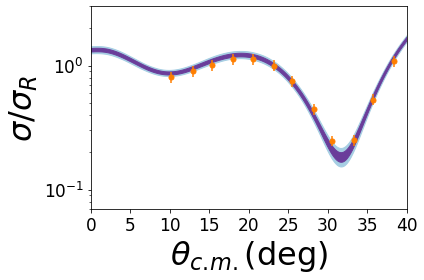

In [27]:
pfunk.utilities.plot_ci(all_cs, data=d)
plt.xlim(0.0, 40.0)
plt.ylim(0.07, 3.0)
plt.ylabel('$\sigma / \sigma_R$')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.tight_layout()

(<Figure size 1152x1152 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fefeeb5f710>,
       dtype=object))

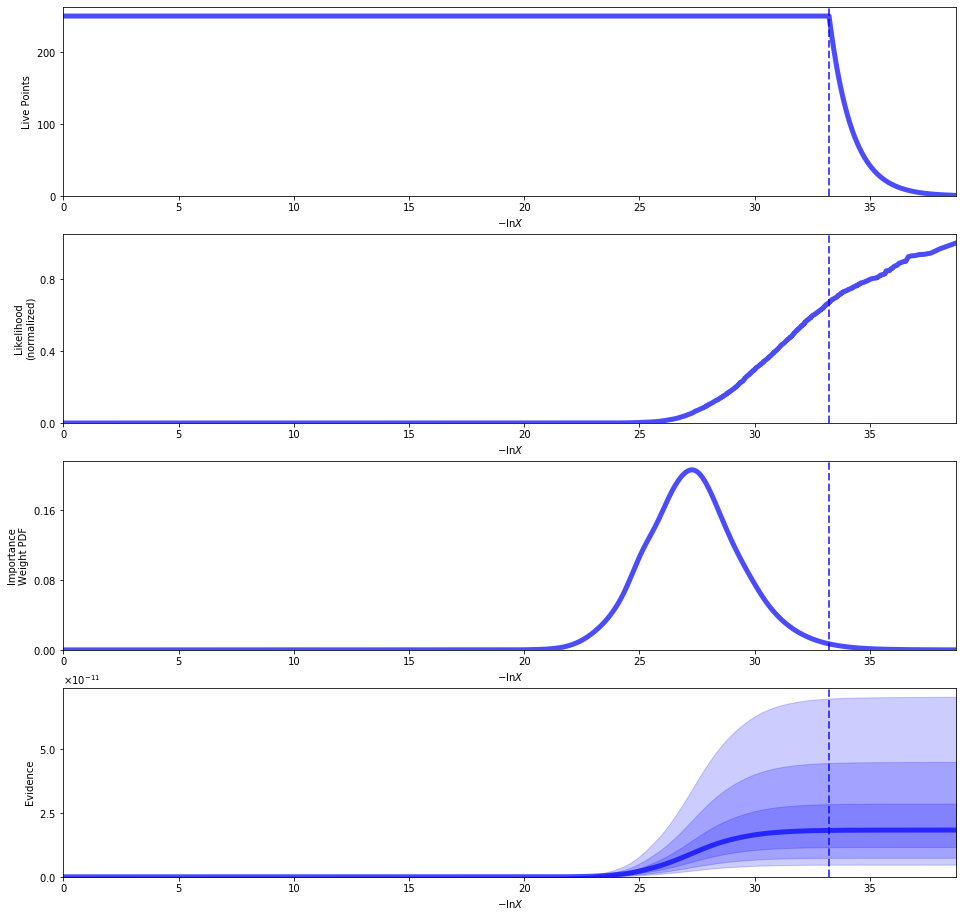

In [21]:
import dynesty.plotting as dyplot

dyplot.runplot(sampler.sampler.results)